# Navigation

We start by importing the requirements here and instanciate both the square world environment and the agent.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent
from collections import deque
import torch
from matplotlib import pyplot as plt

# Instanciate the environment
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
# Gather information about it
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)

# Instanciate a new agent
agent = Agent(state_size=state_size, action_size=action_size, seed=52)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Here we define the training loop for our agent, the model and agent can be found under `model.py` and `dqn_agent.py` respectively.

In [2]:
def train(agent, n_episodes=2000, eps=1.0, eps_min=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)
    for ie in range(n_episodes):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while True: # run a step and learn from it
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break
        
        # save recent scores
        scores_window.append(score)
        scores.append(score)
        # decrease epsilon using the decay
        eps = max(eps_min, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ie, np.mean(scores_window)), end="")
        if ie % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(ie, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ie - 100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    return agent, scores

We start the training here, it should solve the environment in less then 1800 episodes.

In [3]:
agent, scores = train(agent)

Episode 0	Average Score: 0.00
Episode 100	Average Score: 0.65
Episode 200	Average Score: 3.93
Episode 300	Average Score: 8.15
Episode 400	Average Score: 10.91
Episode 457	Average Score: 13.02
Environment solved in 357 episodes!	Average Score: 13.02


By now the model weights should be saved under `checkpoint.pth`.

We plot the scores to see how well the agent was performing over episodes.

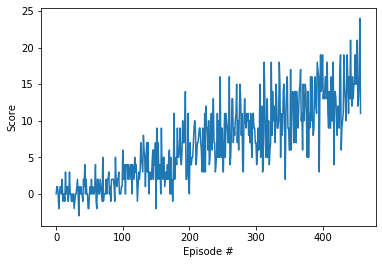

In [4]:
from matplotlib import pyplot as plt

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Watch the trained agent

Run the following cell to watch your trained agent in action

In [9]:
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done:
        break

print("[+] Score:", score)

[+] Score: 18.0


Finally don't forget to close the environment.

In [10]:
env.close()